Karen Gong

Partner: Harrison Robel 

PHYS 434 AA Lab 2 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

Convolution is a mathematical operation performed on two functions to create a third function that describes how the shape of one is changed by the other. It's used to calculate the probability of a sum or average. The general mathematical expression is Pₐ(x) * Pᵦ(x), where the * operator means convolution. For discrete distributions, the expression becomes Pₐ₊ᵦ(x) = Σ PₐPᵦ(x-𝓏) and for continuous distributions, the expression is Pₐ₊ᵦ(x) = ∫PₐPᵦ(x-𝓏)d𝓏.

Problem 1

Convolution is useful when looking for gamma-ray sources using a Fermi telescope within the background of cosmic-rays that provide a discrete noise term across the sky that follow a Poisson distribution. It is important to calculate the probability that the signal came from the background. 


The average cosmic-ray background for this Poisson distribution (X) will be 1 and the average number of gamma-rays emitted by the source (Y) will be 5.

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

As the probability distribution of the background is integrated for more days, the graphs get wider and longer.

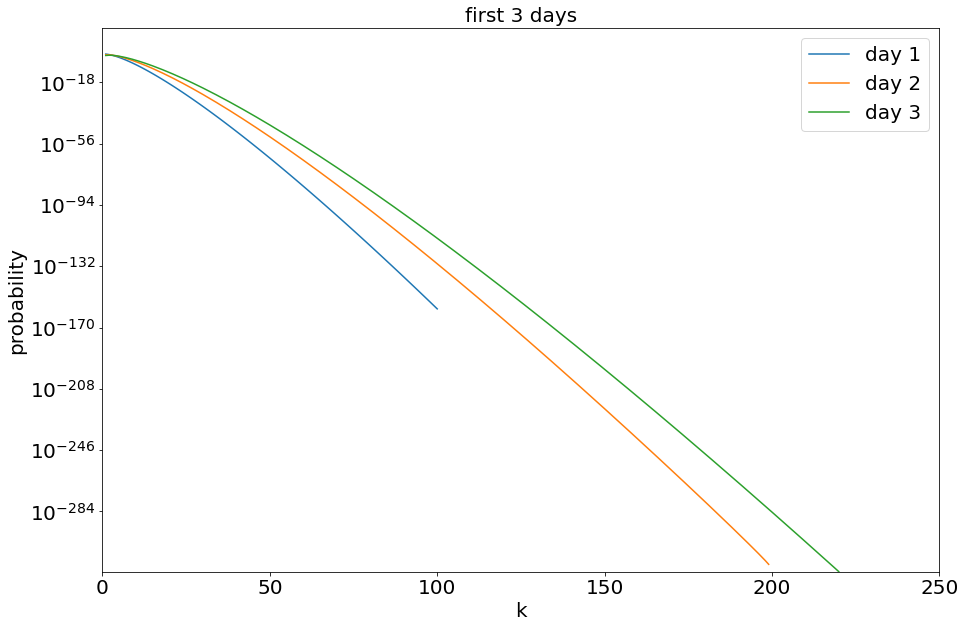

In [2]:
mu = 1 #X
k = np.arange(1,101) #x-axis

d = stats.poisson.pmf(k,mu)
plt.plot(range(1,101), d, label = 'day 1')

d2 = np.convolve(d, d)
plt.plot(range(1,200), d2, label = 'day 2')

d3 = np.convolve(d2, d)
plt.plot(range(1,299), d3, label = 'day 3')

plt.title("first 3 days", size = 20)
plt.yscale("log")
plt.ylabel("probability", size = 20)
plt.tick_params(labelsize = 20)
plt.xlabel("k", size = 20)
plt.legend(fontsize = 20)
plt.xlim([0,250])
plt.show()

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

(0.0, 250.0)

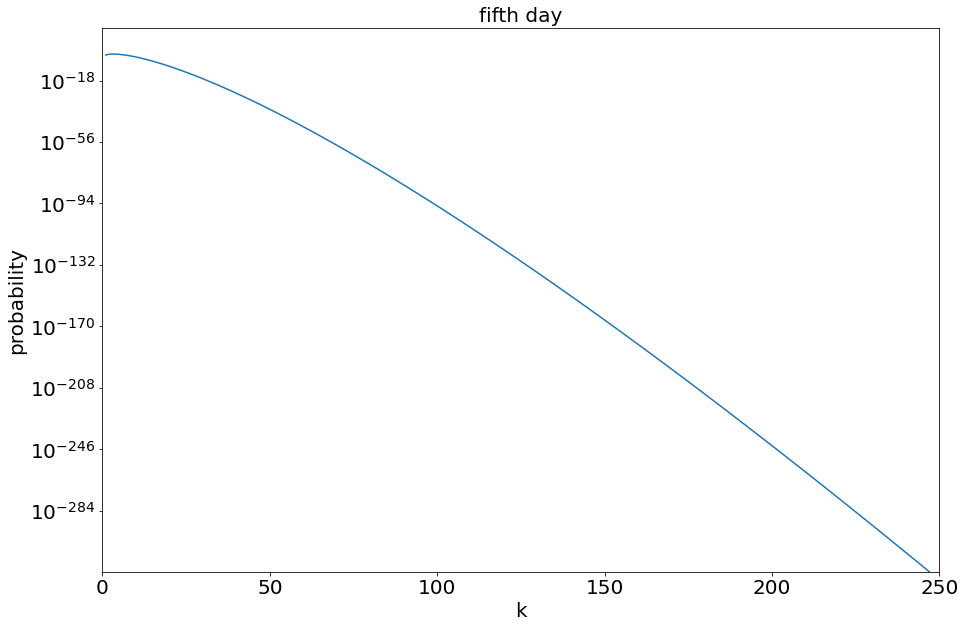

In [3]:
d4 = np.convolve(d3, d)
d5 = np.convolve(d4, d)
plt.plot(range(1,497), d5)

plt.title("fifth day", size = 20)
plt.yscale("log")
plt.ylabel("probability", size = 20)
plt.tick_params(labelsize = 20)
plt.xlabel("k", size = 20)
plt.xlim([0,250])

As the graphs are integrated over and over again, the probability distribution is still a Poisson distribution. The width of the graph gets wider the more times the distribution is summed over. This makes mathematical sense because convoluting functions is similar to multiplying a distribution by a scalar, and would just be the same type of distribution with a different magnitude. This makes conceptual sense because summing two Poisson distributions will yield another Poisson distribution. 

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theorem.

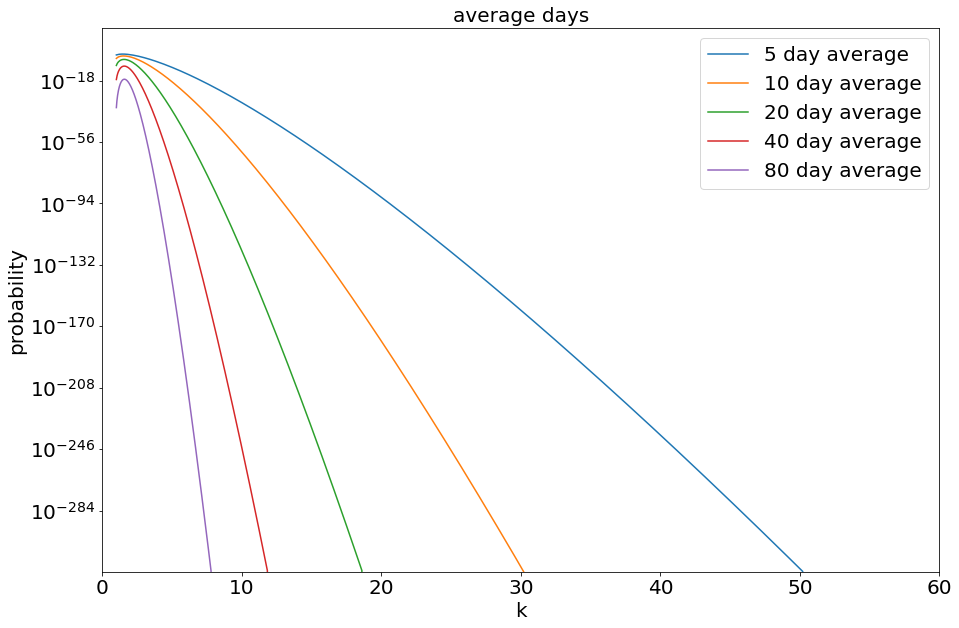

In [4]:
#average 5 days
cx = np.linspace(1, 100,num = 496) 
plt.plot(cx, d5, label = "5 day average")

#average 10 days
d10 = np.convolve(d5, d5)
cx = np.linspace(1, 100,num = 991) 
plt.plot(cx, d10, label = "10 day average")

#average 20 days
d20 = np.convolve(d10, d10)
cx = np.linspace(1, 100,num = 1981) 
plt.plot(cx, d20, label = "20 day average")

#average 40 days
d40 = np.convolve(d20, d20)
cx = np.linspace(1, 100,num = 3961) 
plt.plot(cx, d40, label = "40 day average")

#average 80 days
d80 = np.convolve(d40, d40)
cx = np.linspace(1, 100,num = 7921) 
plt.plot(cx, d80, label = "80 day average")

plt.title("average days", size = 20)
plt.yscale("log")
plt.ylabel("probability", size = 20)
plt.tick_params(labelsize = 20)
plt.xlabel("k", size = 20)
plt.legend(fontsize = 20)
plt.xlim([0,60])
plt.show()

The way averaging days works is by scaling down the x-axis by the number of convolutions. This makes it easier to see how the probability distribution converges the more convolutions are performed.

The probability distribution becomes increasingly more Gaussian-like the more days are averaged over. Above, I graphed the distribution for different ranges of days (5, 10, 20, 40, 80), and as the number of days I average over increase, the more normal the distribution looks. This is related to the central limit theorem because the normalized summing converges toward a normal distribution even though the original values do not follow a Gaussian distribution, as can be seen from B). The pdf is still a Poisson distribution, but averaging the days shows that the distribution converges to a normal distribution (central limit theorem).

D) Pick some number of days N, and assume you saw Y * N gamma rays from your source. Calculate the 'sigma' of your observation. (In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.)

Choose N to be 20 days. Y, chosen from earlier, is 5. Mu (X) is 1. 

In [5]:
y = 5
N = 25
yN = y * N

# probability of observation
prob = stats.poisson.sf(yN, N)

# sigma of observation
sig = stats.norm.ppf(prob, N)
print("The sigma value is:", sig)

The sigma value is: 10.694216010829917


To calculate the sigma of the observation over many days (20), the probability is first determined by multiplying Y (average number of gamma-rays emitted by source) by the number of days N. This will give the probability of observing gamma rays from the source. Then after, the sigma of the observation can be determined. The sigma value is over 10 sigma and is way over 5-sigma, which makes it statistically significant. This value makes sense because the probability that the telescope is receiving the same gamma ray signal over 25 days is very unlikely.

Problem 2 - Rayleigh Distribution

Show how the distribution changes as you average over more observing intervals. Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

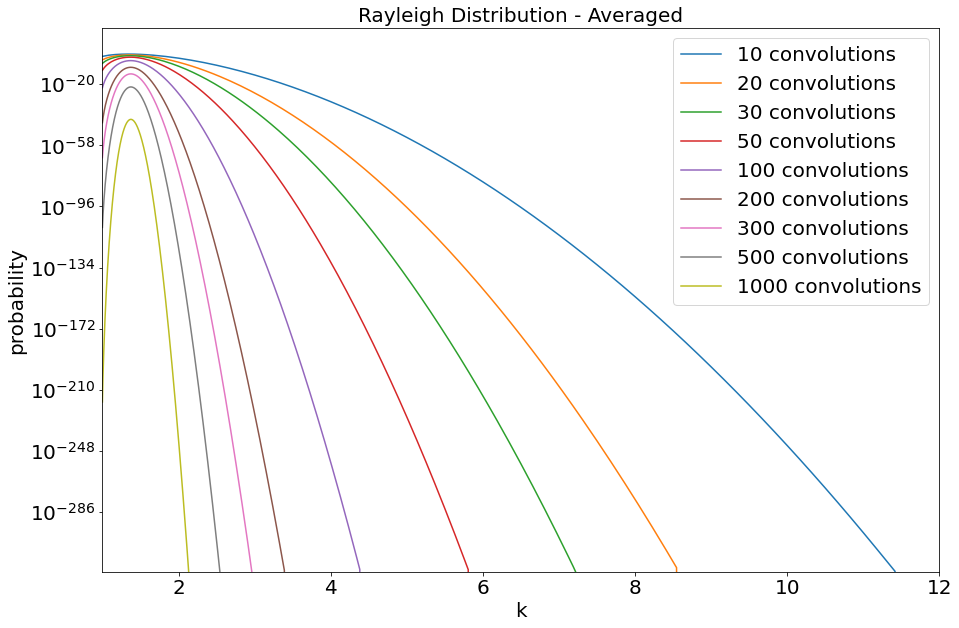

In [6]:
x = np.arange(1,101)
c1 = stats.rayleigh.pdf(x)
c = c1

# define a function that will do specific number of convolutions
def conv(con, con1, num):
    i = 0
    while i <= num:
        con = np.convolve(con, con1)
        i = i + 1
    return con

# 10 convolutions
c10 = conv(c,c1,10)
cx = np.linspace(1,100,num = 1189)
plt.plot(cx, c10 , label = '10 convolutions')

# 20 convolutions
c20 = conv(c,c1,20)
cx = np.linspace(1,100,num = 2179)
plt.plot(cx, c20 , label = '20 convolutions')

# 30 convolutions
c30 = conv(c,c1,30)
cx = np.linspace(1,100,num = 3169)
plt.plot(cx, c30 , label = '30 convolutions')

# 50 convolutions
c50 = conv(c,c1,50)
cx = np.linspace(1,100,num = 5149)
plt.plot(cx, c50 , label = '50 convolutions')

# 100 convolutions
c100 = conv(c,c1,100)
cx = np.linspace(1,100,num = 10099)
plt.plot(cx, c100 , label = '100 convolutions')

# 200 convolutions
c200 = conv(c,c1,200)
cx = np.linspace(1,100,num = 19999)
plt.plot(cx, c200 , label = '200 convolutions')

# 300 convolutions
c300 = conv(c,c1,300)
cx = np.linspace(1,100,num = 29899)
plt.plot(cx, c300 , label = '300 convolutions')

# 500 convolutions
c500 = conv(c,c1,500) 
cx = np.linspace(1,100,num = 49699)
plt.plot(cx, c500 , label = '500 convolutions')

# 1000 convolutions
c1000 = conv(c,c1,1000) 
cx = np.linspace(1,100,num = 99199)
plt.plot(cx, c1000 , label = '1000 convolutions')


plt.title("Rayleigh Distribution - Averaged", size = 20)
plt.yscale("log")
plt.ylabel("probability", size = 20)
plt.tick_params(labelsize = 20)
plt.xlabel("k", size = 20)
plt.legend(fontsize = 20)
plt.xlim([1,12])
plt.show()

As the distribution is averaged over increasing times, the Rayleigh distribution converges to approach a normal or Gaussian distribution. Around 50 convolutions, it starts to become clear that the distribution is becoming more Gaussian. It gets more Gaussian-like the more convolutions. Around 1000 convolutions, the Rayleigh distribution looks obviously like a Gaussian distribution.

Problem 3

Similarly to the background cosmic-rays using the Fermi telescope, there are other background waves that block the signal of waves that physicists are interested in. One is CCD (dark current) which is blocked by thermal noise background detected by optical telescopes. We will need to determine if the readings detected by SWIFT (an X-ray/UV satellite) are actually significant or not. 

Version 1

A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

In this case, choose X (width) to be 5 and pick Y (signal) to be 3.7. 

In [7]:
width = 5
signal = 3.7
x = np.arange(0,5)

prob = stats.norm.cdf(signal, scale = width)
#print(prob)

sigma = stats.norm.ppf(prob, scale = width)
print("The sigma value is:", sigma)

The sigma value is: 3.7000000000000015


The sigma value is 3.7, so we cannot claim a discovery because it is below the traditional 5-sigma value.

Version 2

If SWIFT is unable to give a location, physicists will not know where to look. If there's a specific region of the sky to observe, we can create a pdf of the background to try and detect the CCD.

B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

What is the probability my "signal" was just a random fluke and the signal doesn't really exist?

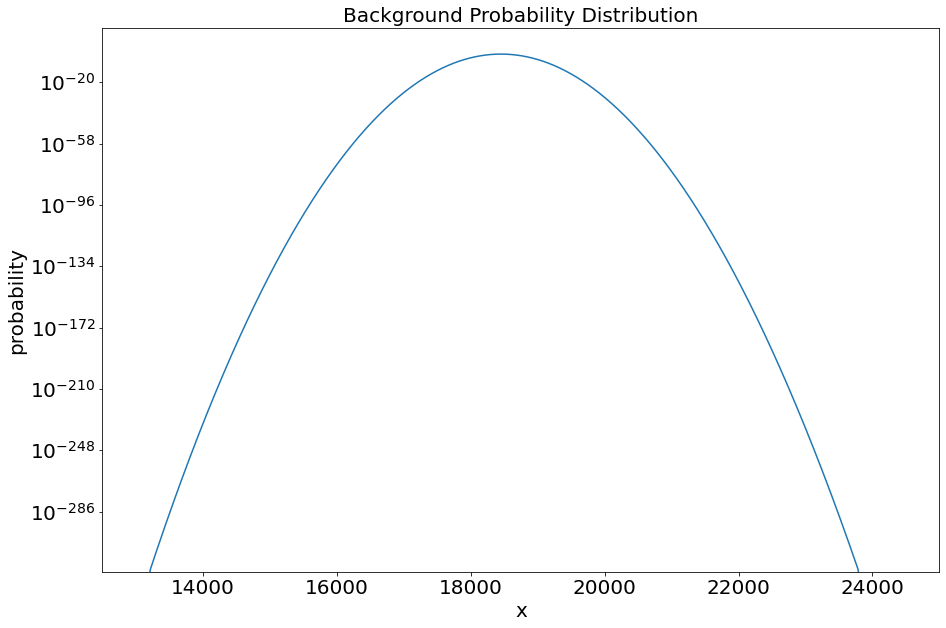

In [8]:
gauss = stats.norm.pdf(x, scale = width)

s = sum(gauss)
g = gauss / s

g1 = g

i = 0
while i <= 10000:
    g1 = np.convolve(g1, g)
    i = i + 1
    
plt.plot(g1)
plt.title("Background Probability Distribution", size = 20)
plt.yscale('log')
plt.ylabel("probability", size = 20)
plt.tick_params(labelsize = 20)
plt.xlabel("x", size = 20)
plt.xlim([12500,25000])
plt.show()

C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [36]:
sig10k = signal * 1000
bright = np.max(g1)
prob = stats.norm.cdf(bright, scale = width * 10000)
sig = stats.norm.ppf(prob, scale = width * 10000)
print("The significance is:", sig)

The significance is: 0.0028720328250620305


This sigma value is much lower than 5-sigma value, which means it's not statistically significant. There is a very low chance of detecting a signal in 10K pixels. This makes sense because there is a large region to measure and it's unlikely that this region is where the signal was observed.

Problem 4

The trials factor, also known as the look-elsewhere effect, is when an apparent statistically significant observation may have occurred by chance just because of the sheer size of the parameter space to be searched. This is an important effect because it would be expected to find about one one-in-a-million event after searching through a million locations; however, this effect can also be overestimated. 

A) Calculate the signal required for a 5-sigma detection in Version 1

In [40]:
prob5 = stats.norm.cdf(5)

norm = np.random.normal(0, width, 10000)

x = np.nonzero((g1))

print(x)

compare = np.where(norm > nprob)
sig1 = compare(1)

(array([13209, 13210, 13211, ..., 23788, 23789, 23790], dtype=int64),)


TypeError: 'tuple' object is not callable

B) Calculate the signal required for a 5-sigma detection in Version 2

C) Discuss how much brighter the signal must be for discovery if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

If the trials factor is 10k, the signal must be 

D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

If the trials factor was changed significantly, there would be an corresponding effect on the 5-sigma sensitivity threshold of one less order. For example, if the trials factor was increased an order of 100x magnitude, the signal would need to be 10x brighter to be considered significant. 